In [1]:
import os
from datetime import datetime
import csv
import glob
import matplotlib.pyplot as plt 
from PIL import Image
import glob

from hydroai.gap_prediction import (
    predict_station_gaps,
    plot_fully,
    plot_yearly,
)


In [6]:
station_file = "./data/lib/station_11.0_cleaned.csv"
model_type = "xgboost"

all_combined_dfs, val_full, metrics_gaps, real_predictions = predict_station_gaps(
    station_file, model_type=model_type
)
print(metrics_gaps)

{'input_file_path': './data/lib/station_11.0_cleaned.csv', 'missing_rate': 0.03592906707787201, 'min_gap_length': 1, 'mean_gap_length': 61.32618025751073, 'median_gap_length': 59.0, 'max_gap_length': 141, 'std_gap_length': 37.822818002361764, 'range_gap_length': 140, 'gap_density': 0.03593460826650216, 'nr_gap_days': 233, 'nr_gaps': 2.0, 'min_value': 0.0, 'mean_value': 1679.2774152271274, 'median_value': 94.05, 'max_value': 11300.0, 'std_value': 2567.0520096032656, 'range_value': 11300.0, 'skew_value': 1.5130792652939264, 'kurtosis_value': 1.3201251228376147, 'Q_lags': [1, 2, 3], 'Q_lags_Coefficients': [0.996, -0.62, -0.174], 'P_lags': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'P_lags_Coefficients': [0.442, 0.446, 0.448, 0.451, 0.457, 0.465, 0.478, 0.492, 0.506, 0.515, 0.517, 0.517, 0.513, 0.507, 0.5, 0.492, 0.484, 0.477, 0.468, 0.458, 0.448, 0.441, 0.432, 0.422, 0.412, 0.403, 0.395, 0.388, 0.382, 0.377], 'R2_score'

In [3]:


plot_start_date = None
plot_end_date = None
# Create a results directory with the current date and time
current_datetime = datetime.now().strftime("%Y%m%d_%H%M")


results_folder = os.path.join(
    os.path.dirname(station_file), f"results_{current_datetime}"
)
os.makedirs(results_folder, exist_ok=True)

# Extract the filename from the input file path
filename = os.path.basename(station_file)

# Process the single file

# Save combined plot for the full dataset
plot_fully(
    results_folder,
    val_full,
    real_predictions,
    filename,
    model_type,
    plot_start_date,
    plot_end_date,
)
# Save combined plot per year
plot_yearly(results_folder, val_full, real_predictions, filename, model_type)
# Save the dataset with the real gaps filled with predictions
output_csv_filename = os.path.join(results_folder, f"pred_{filename}")
val_full = val_full.drop(columns=["year"])
val_full.to_csv(
    output_csv_filename, index=True
)  # Save the dataset with filled real gaps



headers = ["input_file_path", "missing_rate","min_gap_length", "mean_gap_length", "median_gap_length", "max_gap_length", 
           "std_gap_length", "range_gap_length", "gap_density", "nr_gap_days", "nr_gaps", "min_value",
           "mean_value", "median_value", "max_value", "std_value", "range_value", "skew_value", 
           "kurtosis_value", "Q_lags", "Q_lags_Coefficients", "P_lags", "P_lags_Coefficients",
           "R2_score", "RMSE", "Mean Bias Error", "MAE", "Percentage Error (%)", "Nash-Sutcliffe",
           "Index of Agreement", "Correlation Coefficient", "KGE Overall", "KGE Correlation", "KGE Bias", 
           "KGE Variability"
]


# Create CSV file at the start with headers
output_file1 = os.path.join(results_folder, f'gaps_evaluation_metrics_{model_type}.csv')
output_file1
# Append the new metrics to the existing CSV file
with open(output_file1, mode='a', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=headers)
    writer.writerow(metrics_gaps)

print(f"Processing completed for {filename}")

Processing completed for station_11.0_cleaned.csv


In [4]:
station_dir = os.path.splitext(os.path.basename(station_file))[0]
station_dir = os.path.join(results_folder, station_dir)    

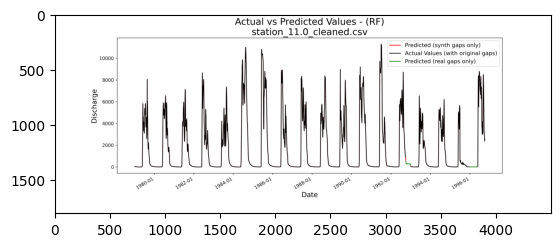

In [5]:
files = glob.glob(os.path.join(results_folder, "*.png")) + glob.glob(os.path.join(results_folder, "*.jpg"))
for file in files:
    img = Image.open(file)
    plt.imshow(img)
    plt.show()

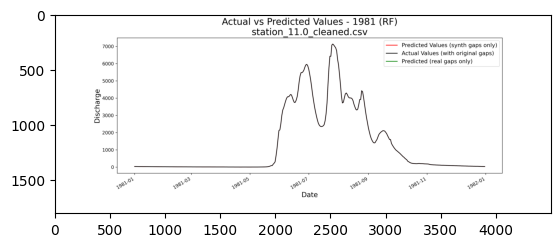

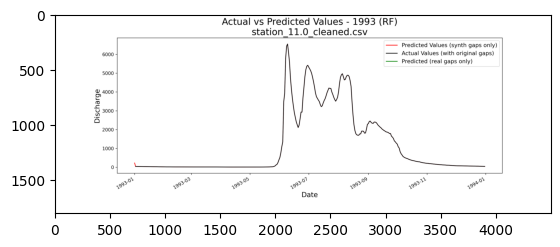

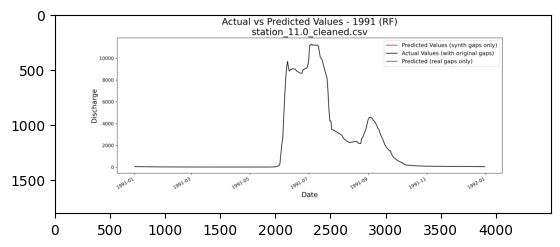

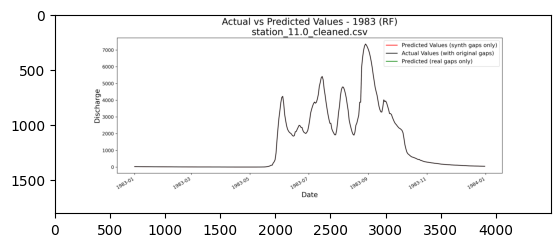

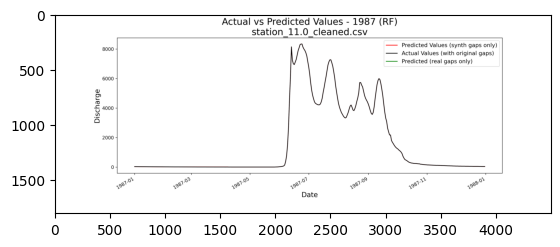

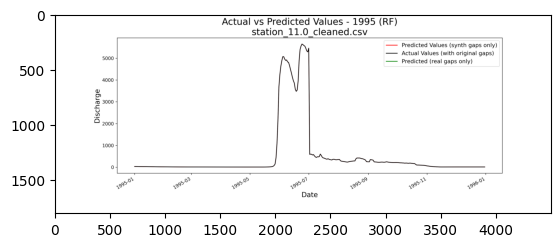

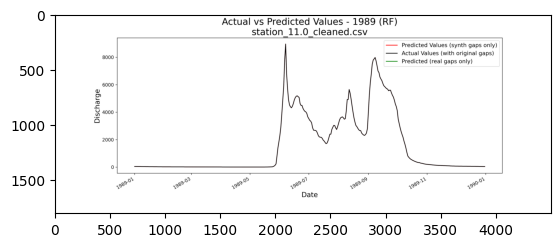

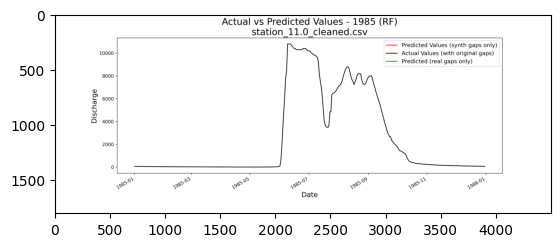

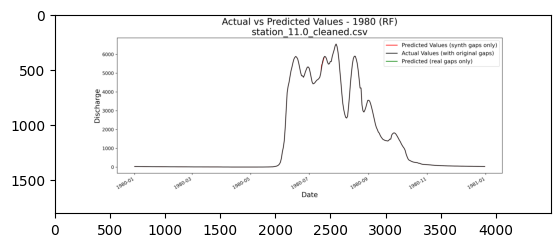

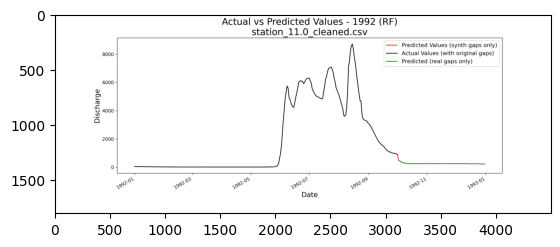

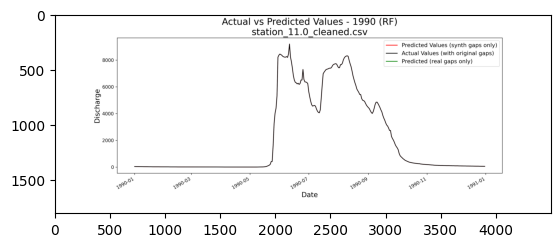

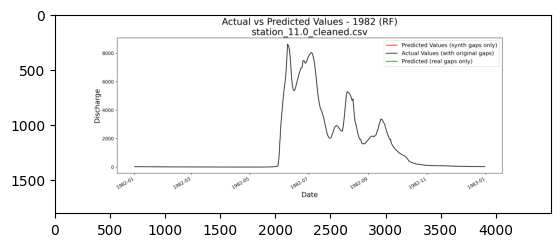

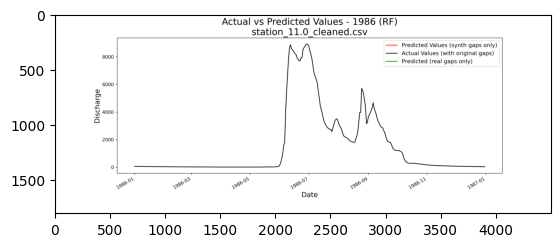

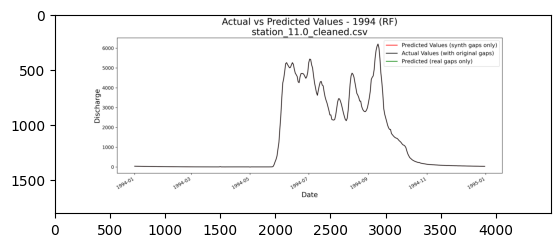

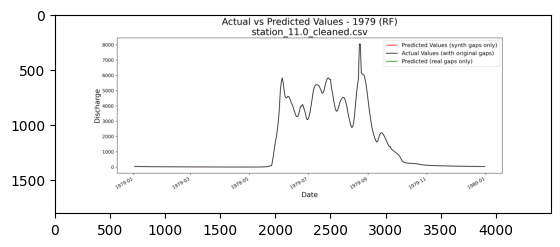

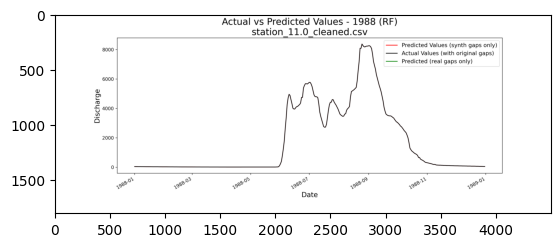

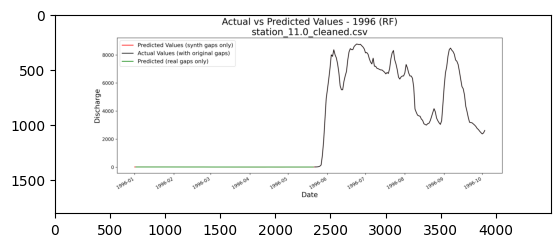

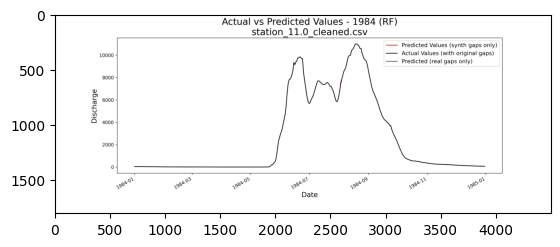

In [6]:

files = glob.glob(os.path.join(station_dir, "*.png")) + glob.glob(os.path.join(station_dir, "*.jpg"))
for file in files:
    img = Image.open(file)
    plt.imshow(img)
    plt.show()